In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12132,-117.22,33.92,5.0,16884.0,2865.0,9509.0,2688.0,4.0938,130900.0,INLAND
14343,-117.17,32.74,38.0,5054.0,1168.0,2366.0,1103.0,2.9422,289400.0,NEAR OCEAN
19840,-119.26,36.50,35.0,1689.0,371.0,1475.0,329.0,2.5719,74300.0,INLAND
9217,-120.26,37.11,33.0,1097.0,254.0,627.0,253.0,1.2794,50700.0,INLAND
10034,-121.08,39.21,17.0,3033.0,590.0,1319.0,583.0,2.4811,111800.0,INLAND


In [3]:
housing_data = housing_data.dropna()

In [4]:
housing_data.shape

(20433, 10)

In [5]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [6]:
housing_data[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [8]:
housing_data = housing_data.drop(housing_data[housing_data['median_house_value'] == 500001].index)

In [9]:
housing_data.shape

(19475, 10)

In [10]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
#convert categorical values to numeric - one-hot encoding
housing_data = pd.get_dummies(housing_data, columns = ['ocean_proximity'])

In [13]:
housing_data.shape #+4 cols

(19475, 14)

In [14]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6923,-118.06,34.01,34.0,1962.0,396.0,1488.0,332.0,3.9091,155100.0,1,0,0,0,0
4187,-118.23,34.13,37.0,1799.0,426.0,1088.0,417.0,2.9750,244500.0,1,0,0,0,0
2482,-120.37,36.16,36.0,613.0,124.0,310.0,124.0,3.0658,65000.0,0,1,0,0,0
11779,-121.28,38.77,6.0,3819.0,550.0,1738.0,587.0,5.8718,201400.0,0,1,0,0,0
520,-122.23,37.76,52.0,3037.0,516.0,1242.0,518.0,5.2128,289900.0,0,0,0,1,0


In [15]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [16]:
X.columns#feature names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
#also shuffles the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)#80 20 split is typical

In [24]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [25]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15580 entries, 7084 to 6528
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   15580 non-null  float64
 1   latitude                    15580 non-null  float64
 2   housing_median_age          15580 non-null  float64
 3   total_rooms                 15580 non-null  float64
 4   total_bedrooms              15580 non-null  float64
 5   population                  15580 non-null  float64
 6   households                  15580 non-null  float64
 7   median_income               15580 non-null  float64
 8   ocean_proximity_<1H OCEAN   15580 non-null  uint8  
 9   ocean_proximity_INLAND      15580 non-null  uint8  
 10  ocean_proximity_ISLAND      15580 non-null  uint8  
 11  ocean_proximity_NEAR BAY    15580 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  15580 non-null  uint8  
dtypes: float64(8), uint8(5)
memor

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True).fit(x_train, y_train)#normalize = scale all numerics betwen 0 and 1

In [27]:
print("Training score: ", linear_model.score(x_train, y_train))#r-squared ; varies by estimator

Training score:  0.6120741951718872


In [28]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [30]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)# weight - how much the fature contributed to the prediction

ocean_proximity_INLAND        -25260.531706
longitude                     -24530.948817
latitude                      -22633.349779
population                       -29.727672
total_rooms                       -7.418743
households                        42.592520
total_bedrooms                    91.378485
housing_median_age               936.323385
ocean_proximity_NEAR BAY        6365.207287
ocean_proximity_<1H OCEAN      12937.181233
ocean_proximity_NEAR OCEAN     16324.039067
median_income                  38522.186636
ocean_proximity_ISLAND        178339.523080
dtype: float64


In [32]:
y_pred = linear_model.predict(x_test)

In [35]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual':y_test})

df_pred_actual.head(10)

,predicted,actual
269,217569.320388,156500.0
8421,195461.382472,191900.0
14340,234053.790152,418800.0
8981,202943.375845,325000.0
14217,210365.265136,137800.0
15884,222576.248025,225400.0
5798,206609.422392,257700.0
19907,110212.255432,72200.0
15015,238734.347327,144700.0
5037,278141.540543,180100.0


In [37]:
from sklearn.metrics import r2_score #performas as well on unseen data as training

print("Testing_score: ", r2_score(y_test, y_pred))

Testing_score:  0.6163684851096729


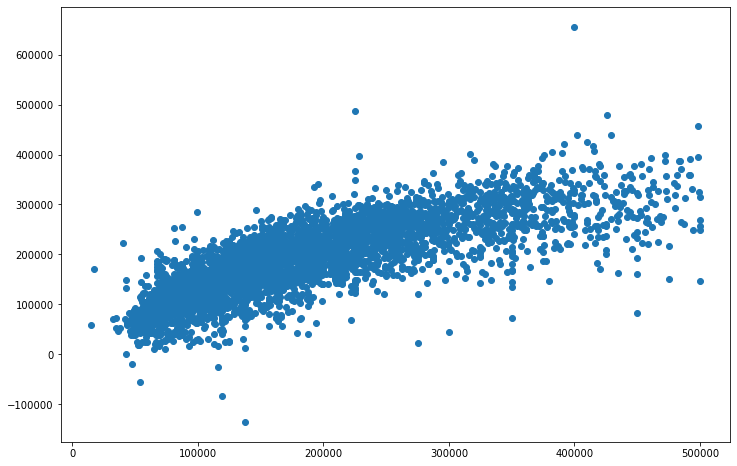

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [40]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [43]:
df_pred_actual_sample.head()

,index,predicted,actual
0,15884,222576.248025,225400.0
1,20323,171924.800093,182000.0
2,19665,164729.211991,165800.0
3,16460,281876.466424,229300.0
4,8500,199645.729225,218600.0


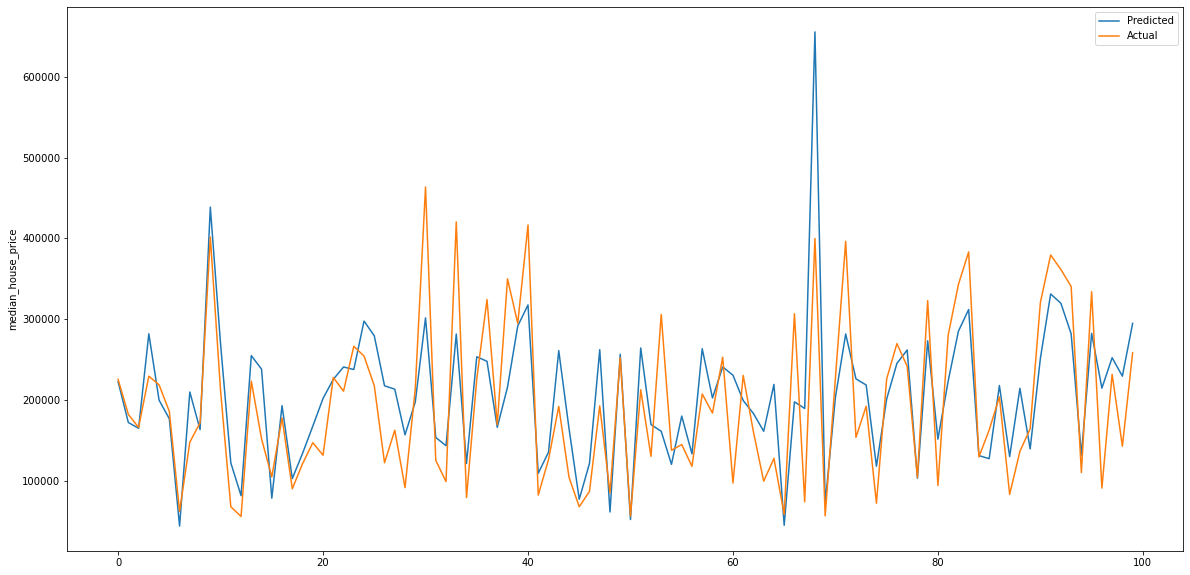

In [44]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_price')

plt.legend()
plt.show()